# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# following are the steps which will be followed
1. Reading, understanding and visualizing the data
2. Preparing the data for model training (Dummy variables creation,train-test split and rescaling)
3. model Training 
4. Residual analysis
5. Prediction and evaluation of the model 

# 1. Reading, understanding and visualizing the data

In [1]:
# Importing the required libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# reading the csv data

In [3]:
# reading the csv data and storing the variable called bb stands for boombikes
bb = pd.read_csv('day.csv')

# Exploring the data

In [4]:
# 5 rows of data
bb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# shape of the data
bb.shape

(730, 16)

In [6]:
# info of the data 
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# description of the data
bb.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# observation
 1. There is no null values in the data set
 2. dataset consists of 730 rows and 15 columns

# droping the unnecessary features

below are the unnecessary features

* instant: record index
* dteday : as we already have the yr and months as a seperate columns we dont need dteday
* casual and registered : as cnt is derived from casual and registered we will this too

In [8]:
bb.drop(labels=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# mapping the data for creating dummy variables

In [10]:
# mapping the categorical variables with string values for dummy variable creation and for ease of visualization

bb['season'] = bb.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bb['mnth'] = bb.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bb['weathersit'] = bb.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow or rain',4:'heavy rain or snow'})
bb['weekday'] = bb.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [11]:
# checking the data after the maping
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Exploratory data analysis

# Univariate Analysis of numerical features

In [12]:
# creating a list of numerical variables for Visualization
num_var = ['temp','atemp','hum','windspeed','cnt']

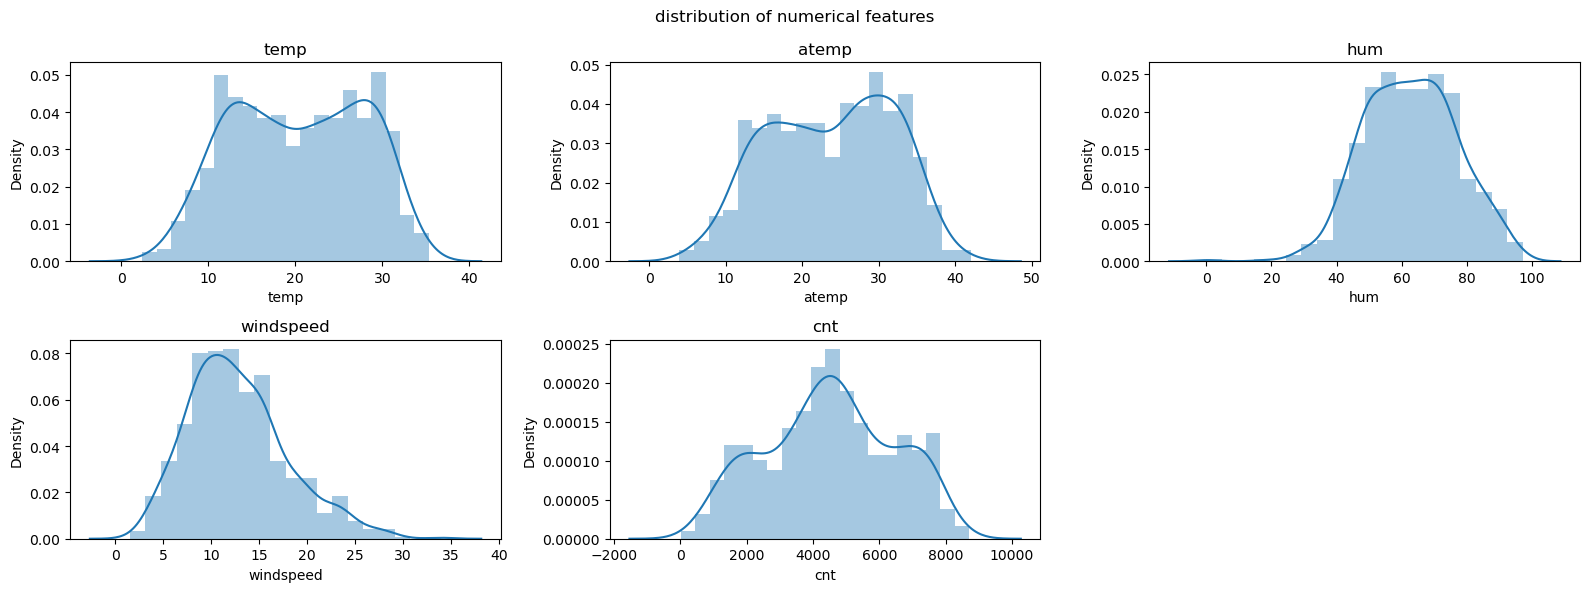

In [13]:
# creating the distribution plot of num_var
plt.figure(figsize=(16, 6))
plt.suptitle('distribution of numerical features')
for i in range(len(num_var)):
    plt.subplot(2, 3, i+1)
    
    # Create a distplot
    sns.distplot(bb[num_var[i]], kde=True, bins=20) 
    
    plt.title(num_var[i])  # Add title to the subplot
    
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# observation

1. count is normally distributed
2. windspeed is left skew
3. hum is slightly right skew
4. temp and atemp both are having almost similar distribution

# Univariate Analysis of categorical features

In [14]:
# creating the list categorical variables
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

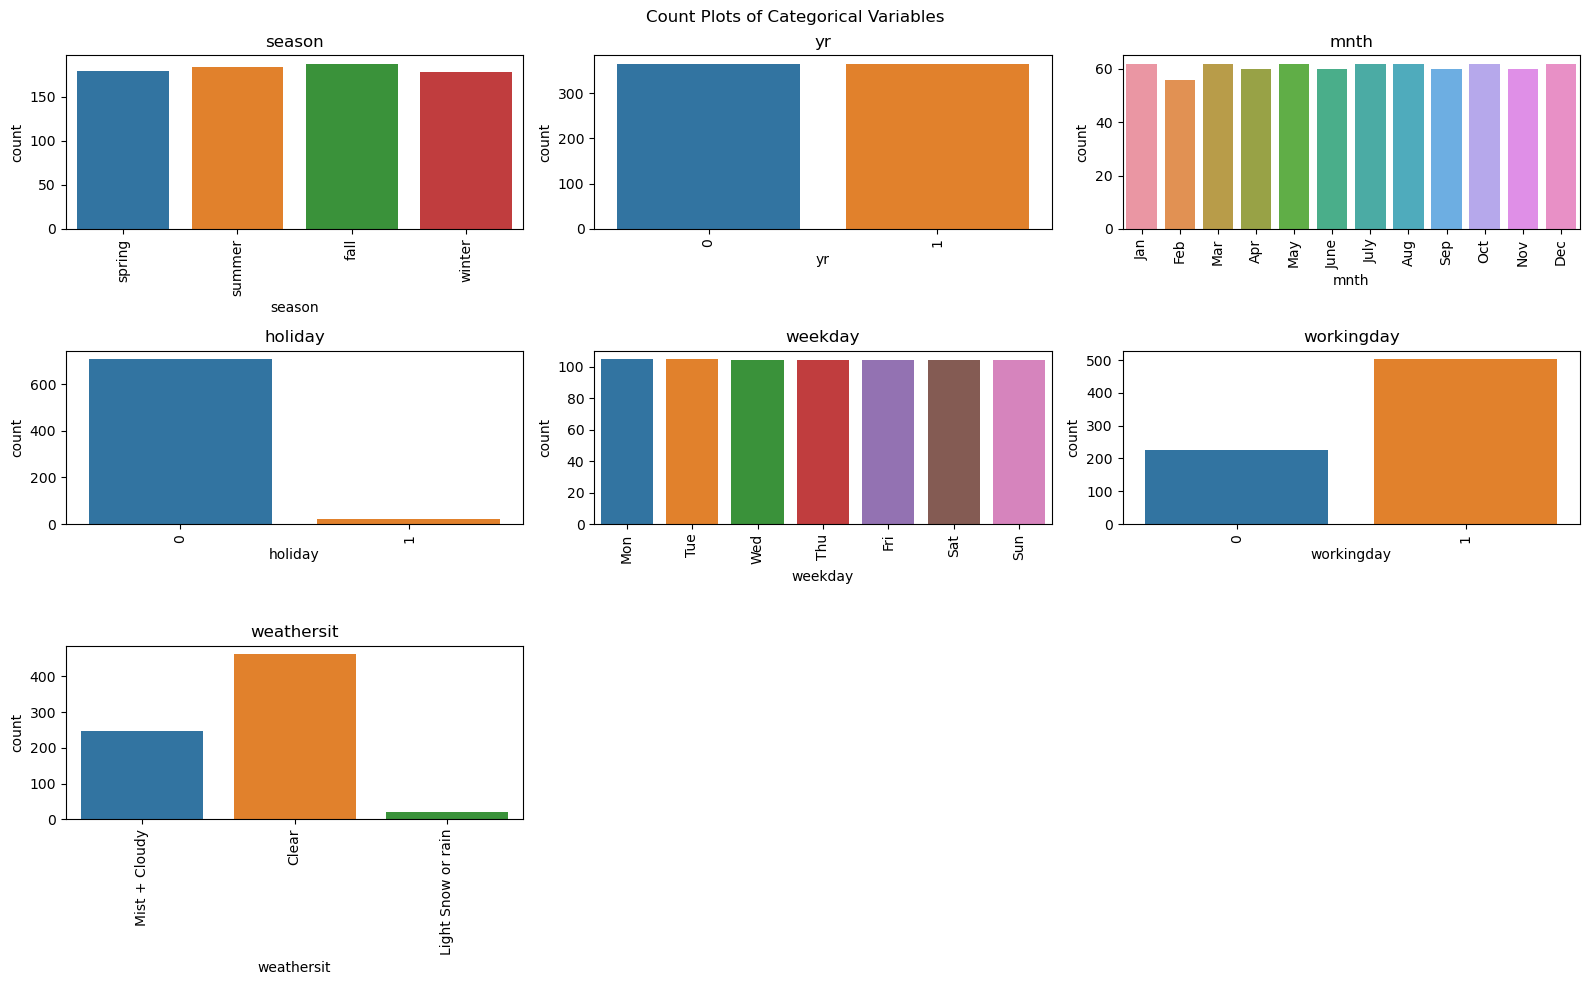

In [15]:
plt.figure(figsize=(16, 10))  # Increase the height of the figure
plt.suptitle('Count Plots of Categorical Variables')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Increase the value of hspace

for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    plt.title(cat_var[i])
    sns.countplot(x=cat_var[i], data=bb)
    # Rotate x-axis labels vertically
    plt.xticks(rotation=90)
    
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# observations

1. from above countplots by looking at season,yr,mnth and weekday we can say that this data has no quality issues as everything looks as expected
2. mosts of the days have clear weather 

# bivariate analysis of numerical features

In [16]:
# droping the cnt variable from num_var
num_var.remove('cnt')
print(num_var)

['temp', 'atemp', 'hum', 'windspeed']


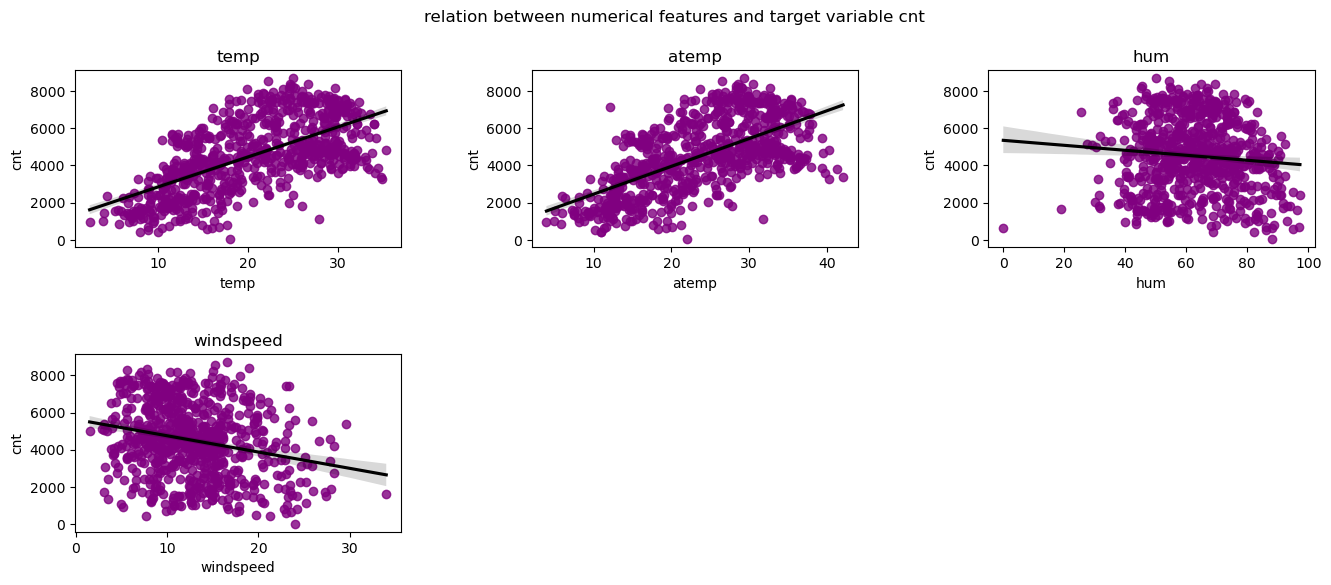

In [17]:
plt.figure(figsize=(16,6))
plt.suptitle('relation between numerical features and target variable cnt')
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Increase the value of hspace
for i in range(len(num_var)):
    plt.subplot(2, 3, i+1)
    plt.title(num_var[i])
    sns.regplot(x=num_var[i],y='cnt',data=bb,line_kws={'color':'black'},scatter_kws={'color':'Purple'} )
plt.show()

# observations
1. cnt variable shows a positive relationship with temp,atemp
2. cnt shows a negative relationship with windspeed and hum 

# bivariate analysis of categorical features

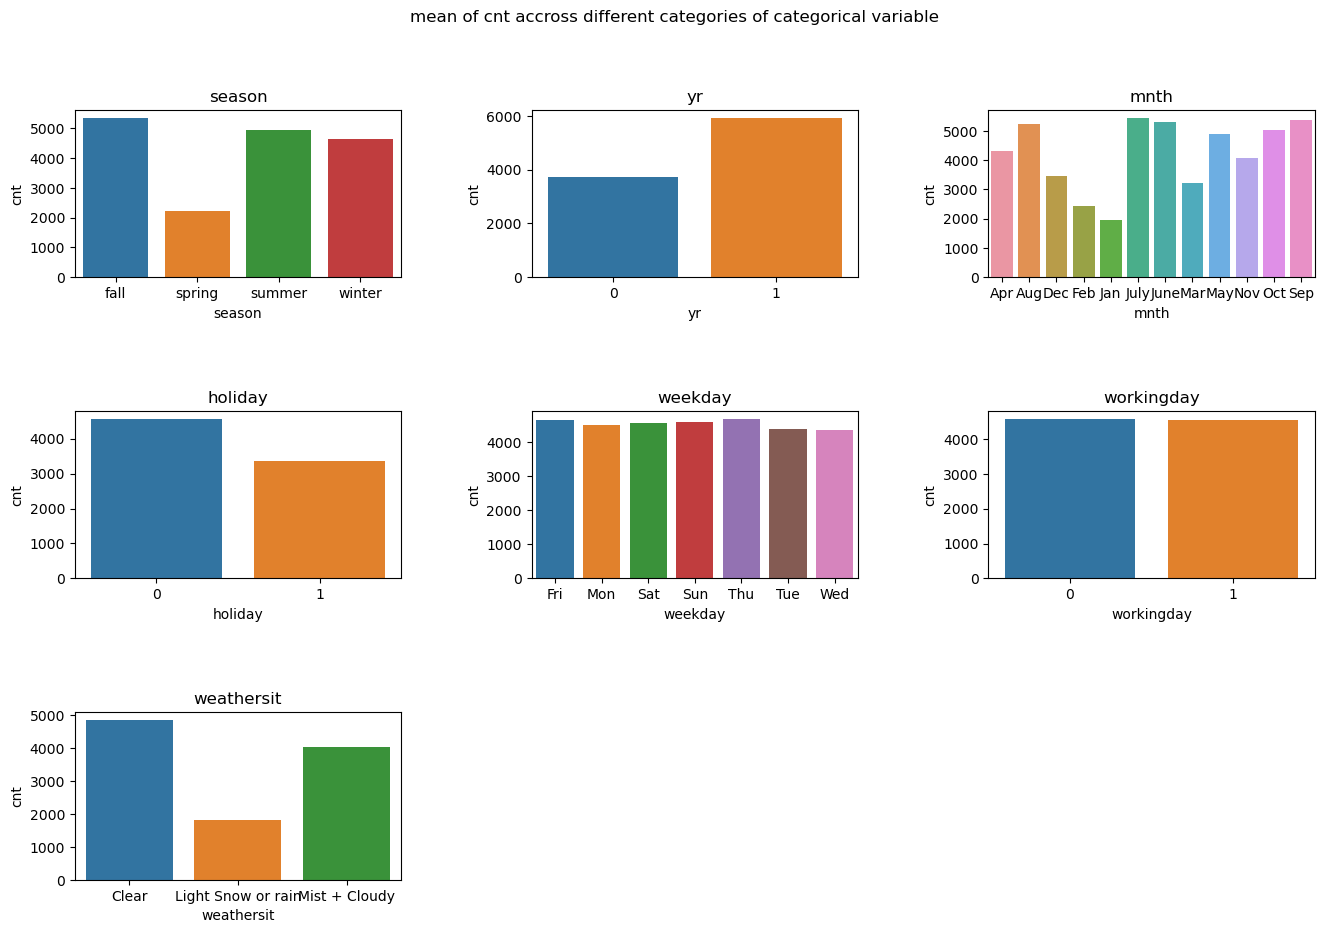

In [18]:
plt.figure(figsize=(16,10))
plt.suptitle('mean of cnt accross different categories of categorical variable')
plt.subplots_adjust(wspace=0.4, hspace=0.8)  # Increase the value of hspace
for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=cat_var[i], y='cnt', data=bb.groupby(cat_var[i]).median().reset_index())  # Corrected line
    plt.title(cat_var[i])

plt.show()


# observations
1. fall and summer has highest no of customers 
2. 2019 has highest no of bike rentals on avg as comparied to 2018 which means deman for bike rents are increasing
3. aug,june and sep have highest number of bike rentals 
4. holidays high no of rentals on avg
5. thus,fri,sat and sun has highest no of rentals
6. weekends have slightly higher no of rentals than working days
7. if weather is clear then no of rentals will increase

# checking the correlations betweem the features

In [19]:
# creating the list of all numerical variables
num_var = ['temp','atemp','hum','windspeed','cnt']

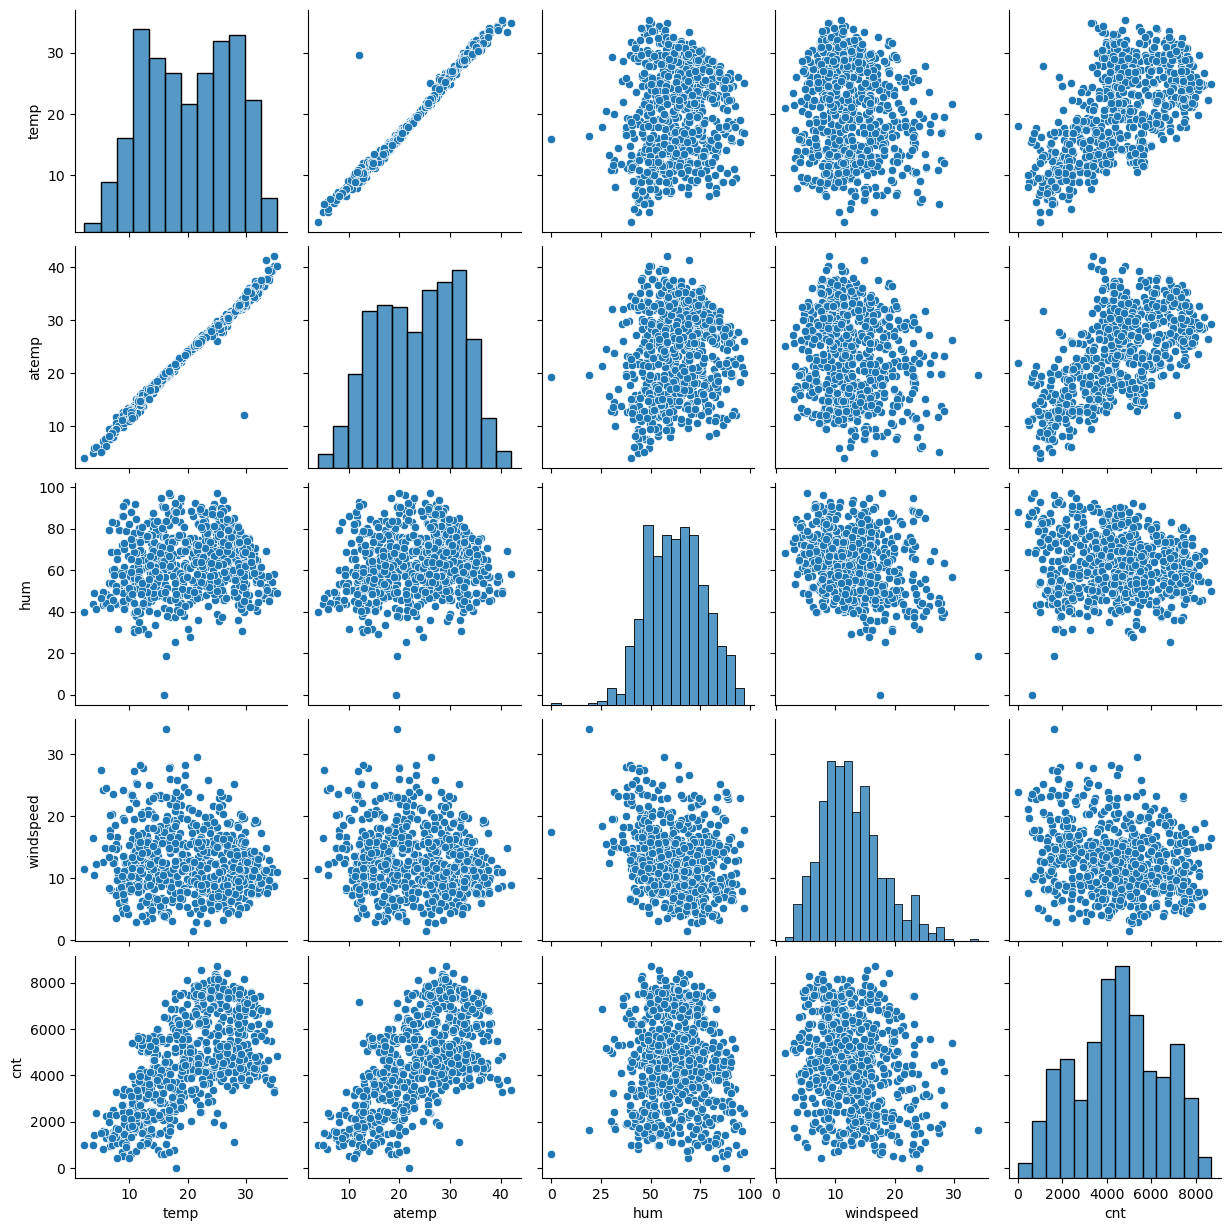

In [20]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bb, vars=num_var)
plt.show()

1. As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed.
2. temp and atep are directly proportional with each other
3. wind speed and hum is inversly proportional with each other

# relationship between all variables using heatmap 

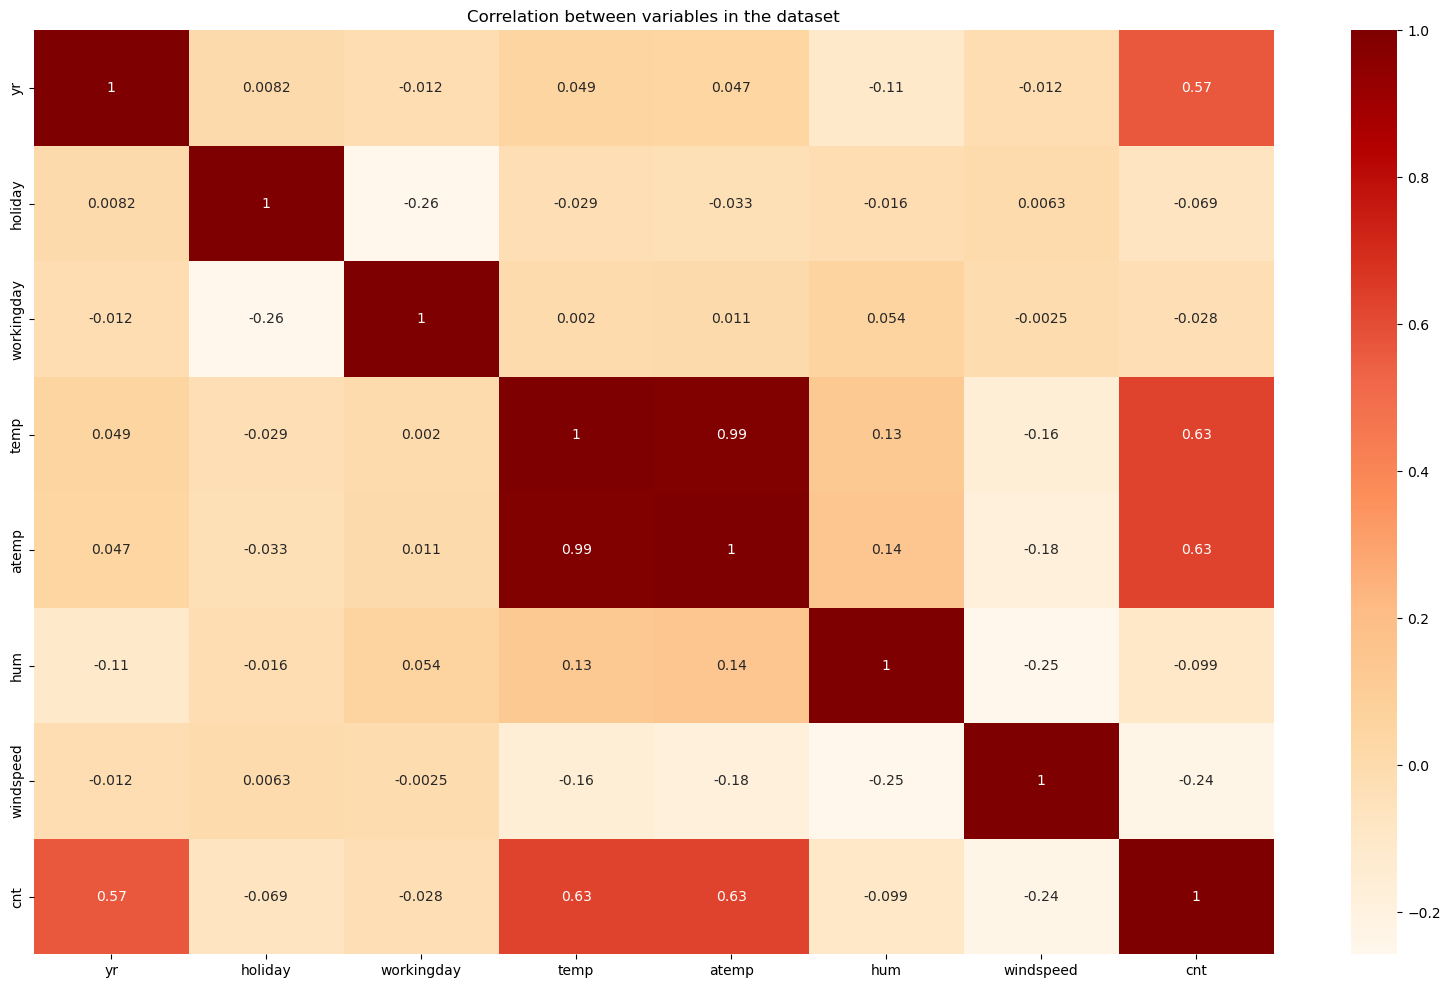

In [21]:
# heat map will help us to correlation between binary variables and target variable too
plt.figure(figsize=(20, 12))
sns.heatmap(bb.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()


# observations
1. cnt has a high correlations with temp,atemp,yr and windspeed
2. atemp and temp are highly correlated
3. working day is negativly correlated with holiday

In [22]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# creating dummy variables 

In [23]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(bb.mnth, drop_first=True)
weekday = pd.get_dummies(bb.weekday, drop_first=True)
weathersit = pd.get_dummies(bb.weathersit, drop_first=True)
season = pd.get_dummies(bb.season, drop_first=True)


In [24]:
#adding the dummy variables to the original dataframe
bb = pd.concat([bb,month, weekday, weathersit, season], axis=1)
bb.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
bb.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bb.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,0,0,...,1,0,0,0,0,0,0,1,0,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,0,0,...,0,1,0,0,0,0,1,1,0,0
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,0,0,...,0,0,0,0,0,0,1,1,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,...,0,0,0,0,1,0,0,1,0,0


In [26]:
# info of the data frame
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   Aug                 730 non-null    uint8  
 9   Dec                 730 non-null    uint8  
 10  Feb                 730 non-null    uint8  
 11  Jan                 730 non-null    uint8  
 12  July                730 non-null    uint8  
 13  June                730 non-null    uint8  
 14  Mar                 730 non-null    uint8  
 15  May                 730 non-null    uint8  
 16  Nov     

* after creating dummy variables we are ending up with 30 columns and 730 rows

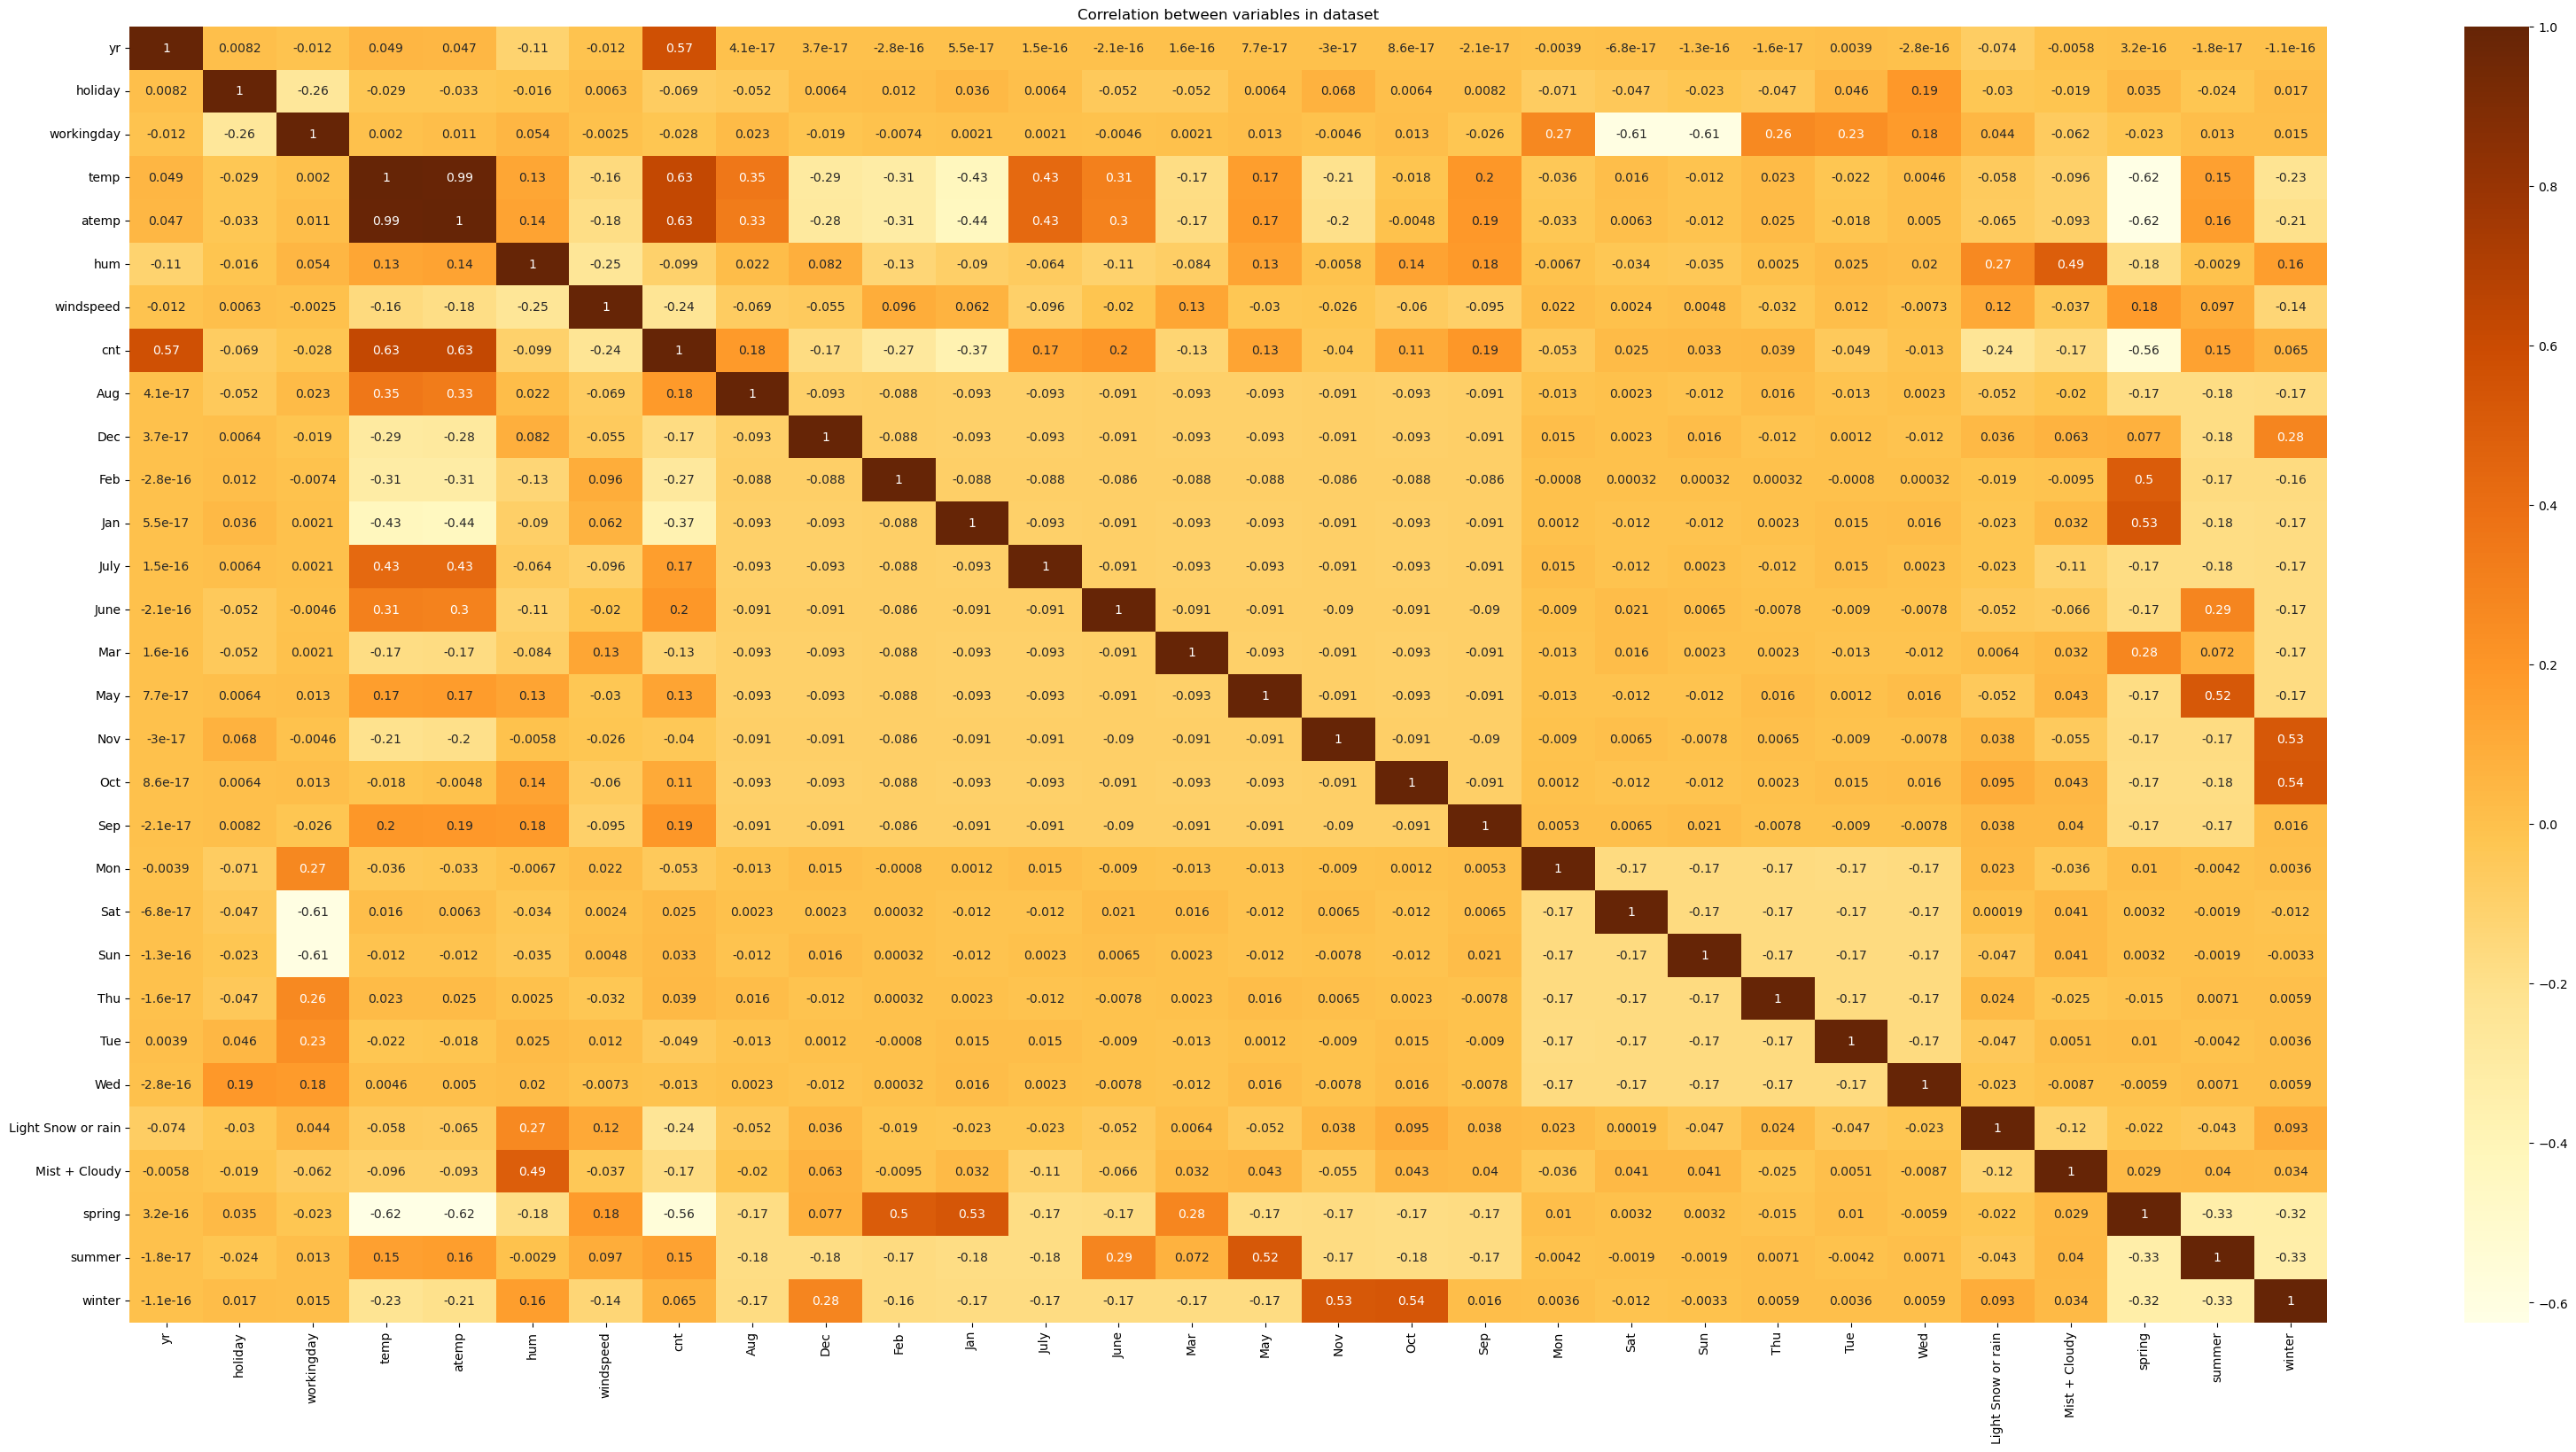

In [27]:
#making a heatmap to check the  correlation between the variables 
plt.figure(figsize=(40, 19))
sns.heatmap(bb.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between variables in dataset')
plt.show()

# observations
1. cnt and yr has high level of correlation
2. working day and sun, sat are negetive correlated as expected
3. cnt is negativly correlated with jan
4. most of the correlations in the above map are making senese

# Using multiple linear regression model

spliting the data into train and test

In [ ]:
bb_train, bb_test = train_test_split(bb, train_size=0.7, random_state=100)

In [288]:
bb_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [289]:
bb_train.shape

(510, 30)

In [290]:
bb_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,0,0,0,0,0,1,0


In [291]:
bb_test.shape

(220, 30)

# Rescaling the data

we need to rescale the data such that all the features data lies in between 0 and 1. We are going to achieve this by using MinMaxScaler function 

In [292]:
scaler = MinMaxScaler()
unscaled_var = ['hum', 'windspeed', 'temp', 'cnt','atemp']  # creating the list of continuous variables for scaling
bb_train[unscaled_var] = scaler.fit_transform(bb_train[unscaled_var])

In [293]:
# checking the description
bb_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


in above description we can see that for all the features maximun and minumum values are 1 and 0 hence scaling is sucessfully done

# dividing the data into x_train and y_train

In [294]:
# dividing the data into x_train and y_train
y_train = bb_train.pop('cnt')
x_train= bb_train

In [295]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [296]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# using rfe

In [297]:
#creating the LinearRegression object
lr = LinearRegression()
lr.fit(x_train, y_train)

# creating the RFE object and passing the estimator lr
rfe = RFE(lr, n_features_to_select = 15)    #selecting 15 variables
rfe = rfe.fit(x_train, y_train)


In [298]:
# lets see the features selected by RFE and there ranking
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Snow or rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [299]:
# creating the list of features names finalized by RFE
final_var = x_train.columns[rfe.support_]

In [300]:
final_var

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow or rain', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [301]:
len(final_var)

15

In [302]:
# creating the data set of only RFE selected features for training the model
x_train_1 = x_train[final_var]
x_train_1.head()

,yr,holiday,temp,hum,windspeed,Dec,Jan,July,Nov,Sep,Light Snow or rain,Mist + Cloudy,spring,summer,winter
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,1,0


In [303]:
# adding constant to training data set
x_train_1 = sm.add_constant(x_train_1)

# creating the model using all RFE selected features
m1 = sm.OLS(y_train, x_train_1)

# fiting the model
m1_fited = m1.fit()

# lets check the  params

m1_fited.params

const                 0.319667
yr                    0.230404
holiday              -0.091089
temp                  0.481503
hum                  -0.162213
windspeed            -0.188726
Dec                  -0.035461
Jan                  -0.043411
July                 -0.055250
Nov                  -0.038701
Sep                   0.075467
Light Snow or rain   -0.246481
Mist + Cloudy        -0.054300
spring               -0.061255
summer                0.042337
winter                0.101921
dtype: float64

In [304]:
# printing the summary of the model m1
print(m1_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        18:59:06   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3197      0

# observation
* above model m1 gives Adj. R-squared of 0.840

In [305]:
# dropping the constant variables from the dataset for checking the VIF
x_train_1 = x_train_1.drop(['const'], axis = 1)

In [306]:
# calculating the VIF of the different features

# calculating the VIF of the different features

vif_1 = pd.DataFrame()     # creating the data frame object 

X_1 = x_train_1            # creating the data set X for creating VIF

vif_1['Features'] = X_1.columns  # filling the features col in VIF data frame

# calculating VIF of different features using variance_inflation_factor function
vif_1['VIF'] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]  

vif_1['VIF'] = round(vif_1['VIF'], 2) # rounding off to 2 decimal places
vif_1 = vif_1.sort_values(by = 'VIF', ascending = False)  # sorting the data b VIF's
vif_1

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Mist + Cloudy,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


# observation
* VIF of hum is very high it should be less 5 so we are going to drop hum

In [307]:
# droping the hum variables because of its extremely high VIF 
x_train_2 = x_train_1.drop(['hum'], axis = 1)

In [308]:
# adding constant to updated data set
x_train_2 = sm.add_constant(x_train_2)

# creating model with updated data set
m2 = sm.OLS(y_train, x_train_2)

# fiting the model-2
m2_fited = m2.fit()

# lets see its summary
print(m2_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        18:59:09   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2450      0

# observation 
* after droping hum there is reduction R-squared and Adj. R-squared but its still in good limit 

In [309]:
# droping the const variables because of its extremely high VIF 
x_train_2 = x_train_2.drop(['const'], axis = 1)

In [310]:
# calculating the VIF of the remaning features
vif_2 = pd.DataFrame()
X_2 = x_train_2
vif_2['Features'] = X_2.columns
vif_2['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = 'VIF', ascending = False)
vif_2

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,Nov,1.81
5,Jan,1.66
6,July,1.59
10,Mist + Cloudy,1.57


now temp is having high VIF but as we saw earlier that cnt is very well correlated with temp so if we drop temp then performance of the model is reducing significantly so we will go ahead and drop summer because logically thinking summer may have impact on temp so by droping summer temp VIF should be adjusted

In [311]:
# as we temp is dependent on summer so we can drop summer to adjust the VIF of temp 
x_train_3 = x_train_2.drop(['summer'], axis = 1) # creating the updated data set without summer

In [312]:
#adding constant to updated data set -3
x_train_3 = sm.add_constant(x_train_3)

# creating the 3rd model
m3 = sm.OLS(y_train, x_train_3)

# fiting the model
m3_fited = m3.fit()

# summary
print(m3_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          4.08e-186
Time:                        18:59:13   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2899      0

In [313]:
#dropping the constant for calculating the VIF
x_train_3 = x_train_3.drop(['const'], axis = 1)

In [314]:
#calculating the VIF of the model
vif_3 = pd.DataFrame()
X_3 = x_train_3
vif_3['Features'] = X_3.columns
vif_3['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = 'VIF', ascending = False)
vif_3

,Features,VIF
2,temp,4.67
3,windspeed,4.05
12,winter,2.55
11,spring,2.36
0,yr,2.06
7,Nov,1.81
5,Jan,1.65
10,Mist + Cloudy,1.54
4,Dec,1.46
6,July,1.36


# observation
* even after droping summer there is no significant effect on R-squared and Adj. R-squared
* also VIF of temp is rediuced to 4.67 which is with in permisible limits

model 3 is having all of its features p-value and VIF values with permissible limit but still lets go ahead and drop other 
features such that its performance is not reduced. we are doing this to achieve a model with same performace as model 3 but with less features

* droping the feature with highest p-value among all features of model-3

In [315]:
# droping nov because it has highest p value among all the features of model-3
x_train_4 = x_train_3.drop(['Nov'], axis = 1) 

In [316]:
# adding constant to updated data set -4
x_train_4 = sm.add_constant(x_train_4)

# creating the model
m4 = sm.OLS(y_train, x_train_4)

# fiting the model
m4_fited = m4.fit()

# summary
print(m4_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          5.72e-186
Time:                        18:59:24   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2780      0

# observation
* there is slight drop in R-squared and Adj. R-squared after droping the var nov
* after droping the nov the p-value of dec increased to 0.043
* so lets drop it

In [317]:
#dropping the constant for calculating the VIF
x_train_4 = x_train_4.drop(['const'], axis = 1)

In [318]:
#calculating the VIF of the model
vif_4 = pd.DataFrame()
X_4 = x_train_4
vif_4['Features'] = X_4.columns
vif_4['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = 'VIF', ascending = False)
vif_4

,Features,VIF
2,temp,4.63
3,windspeed,4.01
10,spring,2.36
0,yr,2.06
5,Jan,1.64
11,winter,1.64
9,Mist + Cloudy,1.54
6,July,1.36
4,Dec,1.29
7,Sep,1.20


# obsevation
* no major change in VIF

In [319]:
# droping the DEC features because it has highest p-value among remaing features
x_train_5 = x_train_4.drop(['Dec'], axis = 1) 

In [320]:
# adding constant to updated data set -5
x_train_5 = sm.add_constant(x_train_5)

# creating the model
m5 = sm.OLS(y_train, x_train_5)

# fiting the model
m5_fited = m5.fit()

# summary
print(m5_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.87e-186
Time:                        18:59:28   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2671      0

In [321]:
#dropping the constant for calculating the VIF
x_train_5 = x_train_5.drop(['const'], axis = 1)

In [322]:
#calculating the VIF of the model
vif_5 = pd.DataFrame()
X_5 = x_train_5
vif_5['Features'] = X_5.columns
vif_5['VIF'] = [variance_inflation_factor(X_5.values, i) for i in range(X_5.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by = 'VIF', ascending = False)
vif_5

,Features,VIF
2,temp,4.63
3,windspeed,4.01
9,spring,2.24
0,yr,2.06
4,Jan,1.60
8,Mist + Cloudy,1.53
10,winter,1.39
5,July,1.36
6,Sep,1.20
7,Light Snow or rain,1.08


# observation
* still there is no major drop in R-squared and Adj. R-squared
* after droping DEC we are left with 11 features 
* among these 11 features Jan lets go ahead a see the performance after droping the Jan.
* even though Jan p-value is less than 0.05 we are still droping to achieve a high performace model with least features as possible

In [323]:
# droping the jan features because it has highest p-value among remaing features
x_train_6 = x_train_5.drop(['Jan'], axis = 1) 

In [324]:
x_train_6 = sm.add_constant(x_train_6)

m6 = sm.OLS(y_train, x_train_6)

# fiting the model
m6_fited = m6.fit()

# summary
print(m6_fited.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          3.10e-186
Time:                        18:59:32   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2531      0

In [325]:
#dropping the constant for calculating the VIF
x_train_6 = x_train_6.drop(['const'], axis = 1)

In [326]:
#calculating the VIF of the model
vif_6 = pd.DataFrame()
X_6 = x_train_6
vif_6['Features'] = X_6.columns
vif_6['VIF'] = [variance_inflation_factor(X_6.values, i) for i in range(X_6.shape[1])]
vif_6['VIF'] = round(vif_6['VIF'], 2)
vif_6 = vif_6.sort_values(by = 'VIF', ascending = False)
vif_6

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
8,spring,1.64
7,Mist + Cloudy,1.52
9,winter,1.39
4,July,1.35
5,Sep,1.20
6,Light Snow or rain,1.08
1,holiday,1.04


# observation
* after droping Jan we are still left with 10 features with  R-squared and Adj. R-squared of 0.832 and 0.829
* now if we look at p-values of the remaining features then we can see that all of them are 0.0000 which mean all of the features are now very significant if we drop any of them then performance of the model will reduce significantly so we are stoping at model 6
* VIF's of all the features are also within the limits which means that none of features among the 10 dependent on other features

# Residual analysis 
Residual analysis is a crucial step in the validation and evaluation of regression models, including linear regression, to assess how well the model fits the data and whether the underlying assumptions of the model are met. Residuals are the differences between the actual observed values and the predicted values from the regression model. Analyzing these residuals helps to understand the model's performance and identify any patterns or issues that might not be apparent from looking at the model's output alone.

# The assumptions of a multiple linear regression model are

# Normality of Residuals and Error terms should have mean zero: 
1.The residuals should be normally distributed. This assumption is crucial for hypothesis testing and confidence interval estimation.


In [327]:
# adding costant
x_train_6 = sm.add_constant(x_train_6)

In [328]:
y_pred_train = m6_fited.predict(x_train_6)

In [329]:
y_pred_train

576    0.744170
426    0.458802
728    0.392825
482    0.559400
111    0.275880
         ...   
578    0.849875
53     0.216444
350    0.269779
79     0.307660
520    0.627534
Length: 510, dtype: float64

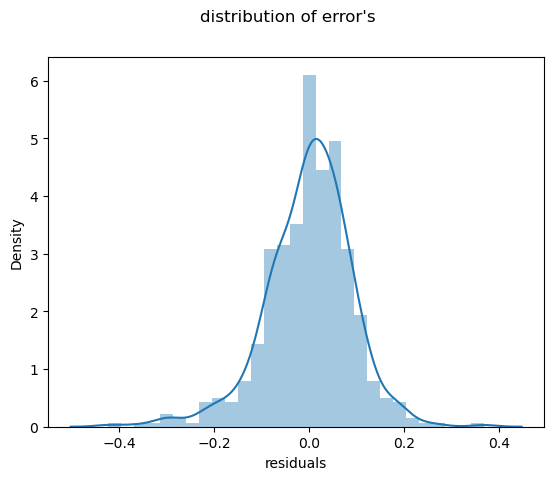

In [330]:
residual = y_train-y_pred_train
sns.distplot(residual)
plt.suptitle('distribution of error\'s')
plt.xlabel('residuals')
plt.show()

# observation
* from above distplot we can adress two of the important assumptioms of Linear Regression they are 
          1. Normality of Residuals  and 
          2. Error terms should have mean zero
          
- from the above distplot we can see that Error terms are normally distributed with mean centered arround zero.


# Error terms are independent of each other:

The error terms should not be dependent on one another (like in a time-series data wherein the next value is dependent on the previous one).

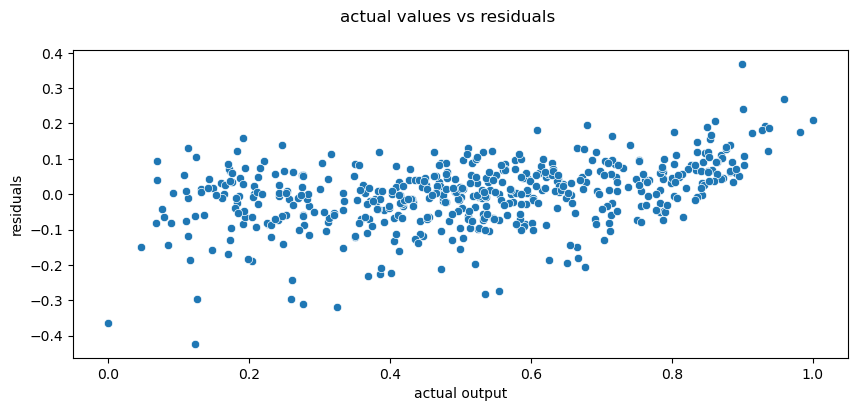

In [331]:
plt.figure(figsize=(10,4))
sns.scatterplot(y=residual,x=y_train)
plt.suptitle('actual values vs residuals')
plt.xlabel('actual output')
plt.ylabel('residuals')
plt.show()

# observation
there is no Systematic Pattern or any fan or funnel like shape The spread of the residuals along the horizontal axis is fairly consistent across the range of actual output values.

hence we can say that errors are complitly random validating our assumption

# Error terms have constant variance (homoscedasticity):

* The variance should not increase (or decrease) as the error values change.
* Also, the variance should not follow any pattern as the error terms change.

we can check this assumption by ploting a scatter plot between y_pred_train and y_train

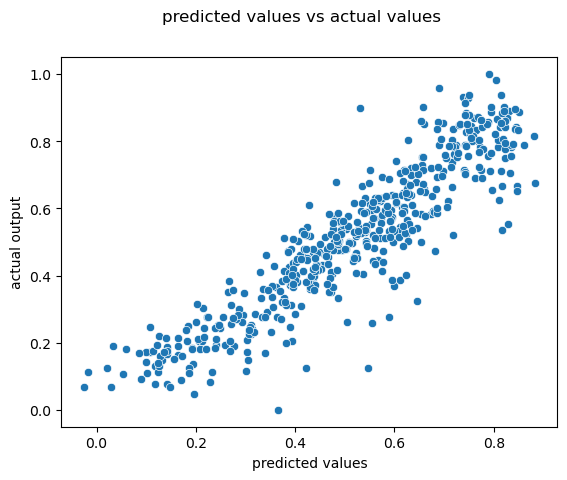

In [332]:
sns.scatterplot(x=y_pred_train,y=y_train)
plt.suptitle('predicted values vs actual values')
plt.xlabel('predicted values')
plt.ylabel('actual output')
plt.show()

# observation
* the above graph proving that the variance of predictions are alomst constant hence validating our assumption of homoscedasticity

#  Making Predictions Using the Final Model

# Applying the scaling on the test sets

In [333]:
# transforming the scale of test data using the fit of train data
bb_test[unscaled_var] = scaler.transform(bb_test[unscaled_var])
bb_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


# spliting test data into x_test and y_test

In [334]:
y_test = bb_test.pop('cnt')   # puting the cnt in y_test
x_test = bb_test            

In [335]:
# checking the x_test
x_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow or rain,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [336]:
# checking the y_test 
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [337]:
# adding the const
x_test = sm.add_constant(x_test)

In [338]:
# selecting the finalized features 
x_test = x_test[x_train_6.columns] 

In [339]:
# checking x_test after adding the const
x_test.head()

,const,yr,holiday,temp,windspeed,July,Sep,Light Snow or rain,Mist + Cloudy,spring,winter
184,1.0,0,1,0.831783,0.084219,1,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0


In [340]:
# using the model m6_fited to predict y_pred_test from x_test
y_pred_test = m6_fited.predict(x_test)
y_pred_test.head()

184    0.364913
535    0.871350
299    0.402027
221    0.602305
152    0.545747
dtype: float64

In [341]:
# printing the r2_scores of test and train data
print('r2_socre of test data',r2_score(y_true=y_test,y_pred=y_pred_test))
print('r2_score of train data',r2_score(y_true=y_train,y_pred=y_pred_train))

r2_socre of test data 0.8074869048294192
r2_score of train data 0.8322027416440079


# observations
1. r2_score of train and R-squared of the train is exaclty same 
2. the difference between r2_scores of the test and train is about 0.024 
3. as the difference is less than 0.05 we can say that model is reliable

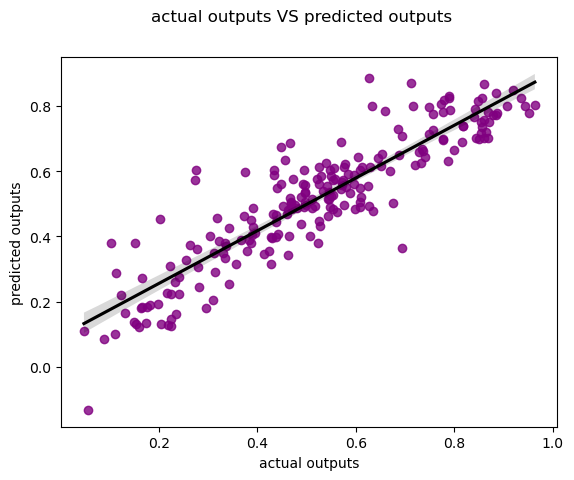

In [342]:
# Visualization of the model output on test data
sns.regplot(y=y_pred_test,x=y_test,data=bb,line_kws={'color':'black'},scatter_kws={'color':'Purple'} )
plt.xlabel('actual outputs')
plt.ylabel('predicted outputs')
plt.suptitle('actual outputs VS predicted outputs')
plt.show()

# we see that the equation of our best fitted line is:

In [343]:
# reoving the constant
lm = sm.OLS(y_train, x_train_6)

# fiting the model
m6_fited = lm.fit()

# parameters
print(m6_fited.params)

const                 0.253133
yr                    0.234244
holiday              -0.098014
temp                  0.449789
windspeed            -0.139510
July                 -0.072935
Sep                   0.057311
Light Snow or rain   -0.285463
Mist + Cloudy        -0.079650
spring               -0.112286
winter                0.044893
dtype: float64


$ 
0.253133 +
yr                  \times   0.234244 +
holiday             \times  -0.098014 +
temp                 \times  0.449789 +
windspeed        \times     -0.139510 +
July               \times   -0.072935 +
Sep                   \times 0.057311 +
Light Snow or rain  \times  -0.285463 +
Mist and  Cloudy     \times    -0.079650 +
spring          \times      -0.112286 +
winter             \times    0.044893 
$

# top 3 features are :
1. temperature            (0.449789)
2. Light Snow or rain    (-0.285463)
3. yr                     ( 0.234244)

# model interpretion and explaination

# Interpretation:

1. const (Constant): This represents the intercept of the model. It's the predicted value of the target variable when all other features are zero (or categorical variables are at their reference levels).

2. yr (Year): For each increase of 1 in the year (from 0 to 1, indicating 2018 to 2019), the predicted value of the target variable increases by 0.234. This suggests that as time passes, there is an increase in demand for the shared bikes.

3. holiday: On a holiday, the predicted value of the target variable decreases by 0.098. This indicates that people might rent fewer bikes on holidays.

4. temp (Temperature): For each increase of 1 in temperature, the predicted value of the target variable increases by 0.450. This implies that warmer temperatures are associated with higher demand for shared bikes.

5. windspeed: As windspeed increases by 1, the predicted value of the target variable decreases by 0.140. This suggests that windy conditions might lead to fewer bike rentals.

6. July: In the month of July, the predicted value of the target variable decreases by 0.073. This could mean that bike rentals are slightly lower during this month.

7. Sep (September): In September, the predicted value of the target variable increases by 0.057. This indicates that bike rentals might be slightly higher during this month.

8. Light Snow or rain: Days with light snow or rain are associated with a decrease of 0.285 in the predicted value of the target variable. This implies that unfavorable weather conditions like light snow or rain might result in fewer bike rentals.

9. Mist + Cloudy: Misty and cloudy days lead to a decrease of 0.080 in the predicted value of the target variable. This suggests that bike rentals might be slightly lower on misty and cloudy days.

10. spring: During spring, the predicted value of the target variable decreases by 0.112. This could mean that bike rentals are slightly lower in the spring season.

11. winter: In the winter season, the predicted value of the target variable increases by 0.045. This might indicate that bike rentals increase during winter.



# Explanation:

These coefficients represent how each feature impacts the predicted demand for shared bikes. Positive coefficients indicate a positive impact on bike rentals, while negative coefficients indicate a negative impact. For example, higher temperatures, later years, and certain months (like September and winter) are associated with higher bike rentals. On the other hand, factors like holidays, windy conditions, certain months (like July and spring), and adverse weather conditions (light snow or rain, misty and cloudy days) are associated with lower bike rentals.


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Recommendations to the achieve the Business Goal

1. Temperature Impact: The model shows that temperature has a significant positive impact on bike demand. As the temperature increases, the demand for shared bikes tends to rise. This suggests that during warmer months, BoomBikes should focus on increasing their bike inventory, marketing efforts, and customer engagement to cater to the expected higher demand.

2. Weather Conditions: The presence of variables like "light_snow_rain," "mist," and "Cloudy" indicates that weather conditions have a considerable impact on bike demand. During adverse weather conditions like light snow, rain, or misty weather, bike demand decreases. It's recommended that BoomBikes offer promotional activities or incentives during such weather conditions to encourage bike usage. Additionally, having weather-specific offerings such as rain gear or appropriate biking options could help mitigate the impact of weather on demand.

3. Yearly Trends: The "yr" variable suggests that demand for shared bikes has increased year over year. As the popularity of bike-sharing systems grows, BoomBikes can take advantage of this upward trend by continuing to expand their services, improve user experience, and invest in bike fleet expansion.

4. Seasonal Strategy: The model identifies the impact of seasons on bike demand through variables like "spring" and "winter." BoomBikes should tailor their marketing campaigns, promotions, and bike availability based on the changing seasons. For instance, promoting biking during spring and offering incentives during winter can help capture seasonal fluctuations in demand.

